In [72]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [73]:
df = pd.read_csv('dataset.csv')  #reading data

In [74]:
print(df.head())   #printing first five rows

   ID Checking.Acct Credit.History      Loan.Reason Savings.Acct Employment  \
0   1       No Acct       All Paid          Car New          Low     Medium   
1   2      0Balance        Current          Car New          Low      Short   
2   3      0Balance        Current          Car New      No Acct       Long   
3   4      0Balance        Current        Furniture      No Acct       Long   
4   5       No Acct       All Paid  Small Appliance      No Acct       Long   

  Personal.Status Housing    Job.Type Foreign.National  \
0          Single     Own  Management               No   
1        Divorced     Own     Skilled               No   
2        Divorced     Own     Skilled               No   
3             NaN     Own     Skilled               No   
4          Single   Other     Skilled              Yes   

   Months.since.Checking.Acct.opened  Residence.Time.In.current.district  \
0                                  7                                   3   
1                       

In [75]:
print(df.shape)  #printing number of rows and columns

(807, 14)


In [76]:
print(df.info())             #gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  807 non-null    int64  
 1   Checking.Acct                       807 non-null    object 
 2   Credit.History                      807 non-null    object 
 3   Loan.Reason                         807 non-null    object 
 4   Savings.Acct                        807 non-null    object 
 5   Employment                          796 non-null    object 
 6   Personal.Status                     801 non-null    object 
 7   Housing                             802 non-null    object 
 8   Job.Type                            807 non-null    object 
 9   Foreign.National                    807 non-null    object 
 10  Months.since.Checking.Acct.opened   807 non-null    int64  
 11  Residence.Time.In.current.district  807 non-n

In [77]:
print(df.describe())      #gives statistical information about the data

               ID  Months.since.Checking.Acct.opened  \
count  807.000000                         807.000000   
mean   404.000000                          23.162330   
std    233.105126                          12.807883   
min      1.000000                           5.000000   
25%    202.500000                          13.000000   
50%    404.000000                          19.000000   
75%    605.500000                          31.000000   
max    807.000000                         120.000000   

       Residence.Time.In.current.district         Age  
count                          807.000000  807.000000  
mean                             2.871128   37.766252  
std                              1.162160   12.152643  
min                             -2.000000   19.000000  
25%                              2.000000   28.217325  
50%                              3.000000   35.000000  
75%                              4.000000   44.783122  
max                             10.000000  102.

In [78]:
print(df.isna().sum())          #to check if there are any null values in the data

ID                                     0
Checking.Acct                          0
Credit.History                         0
Loan.Reason                            0
Savings.Acct                           0
Employment                            11
Personal.Status                        6
Housing                                5
Job.Type                               0
Foreign.National                       0
Months.since.Checking.Acct.opened      0
Residence.Time.In.current.district     0
Age                                    0
Credit.Standing                        0
dtype: int64


In [79]:
df = df.dropna()              #dropping all the missing values 

In [80]:
numerical_cols = ['Months.since.Checking.Acct.opened', 'Residence.Time.In.current.district', 'Age']       #storing numerical columns

In [81]:
print(df[numerical_cols].describe())             #summary statistic of the numerical data

       Months.since.Checking.Acct.opened  Residence.Time.In.current.district  \
count                         786.000000                          786.000000   
mean                           23.216285                            2.862595   
std                            12.729785                            1.164857   
min                             5.000000                           -2.000000   
25%                            13.000000                            2.000000   
50%                            19.000000                            3.000000   
75%                            31.000000                            4.000000   
max                           120.000000                           10.000000   

              Age  
count  786.000000  
mean    37.805216  
std     12.172648  
min     19.000000  
25%     28.297761  
50%     35.049729  
75%     44.983797  
max    102.785991  


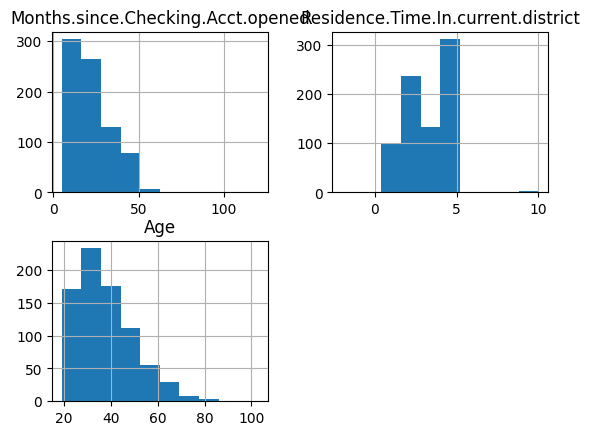

In [82]:
df[numerical_cols].hist()             #plotting hostogram to check for the distribution of numerical data
plt.show()

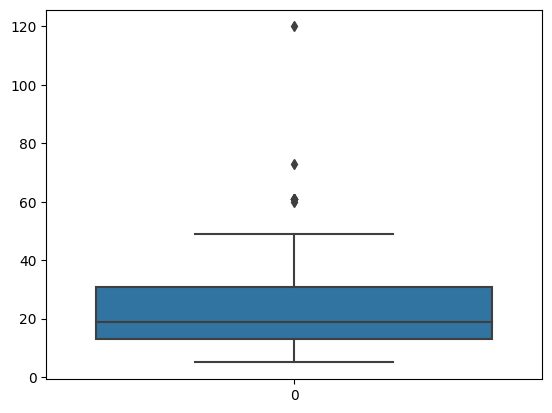

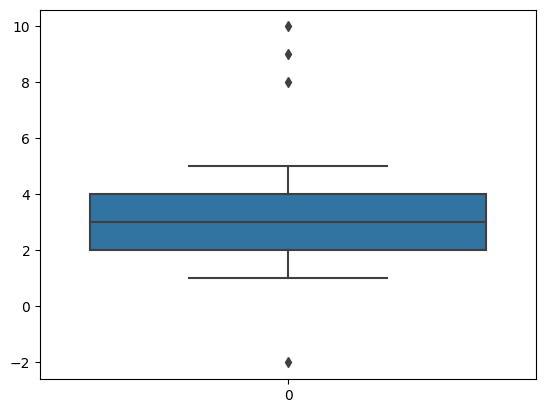

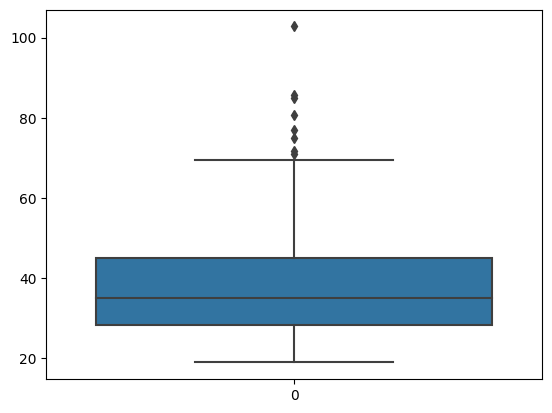

In [83]:
for col in numerical_cols:                          #plotting boxplot to check for outliers
    sns.boxplot(df[col])
    plt.show()  

In [84]:
for col in numerical_cols:                                        #dropping null values from numerical column if any and checking for skewness
    print(col, skew(df[col].dropna()))

Months.since.Checking.Acct.opened 1.333082832090534
Residence.Time.In.current.district 0.2396128529730903
Age 0.9944826745950124


In [85]:
df['Months.since.Checking.Acct.opened'] = np.log(df['Months.since.Checking.Acct.opened'])             #log transformation to handle skewness
df['Age'] = np.log(df['Age'])

In [86]:
for col in numerical_cols:                                  #skewness after log transformation
    print(col, skew(df[col].dropna())) 

Months.since.Checking.Acct.opened -0.11947624636158087
Residence.Time.In.current.district 0.2396128529730903
Age 0.21714904219380676


In [87]:
def find_outliers(col):                                  #creating a function to detect the outliers
    q1 = np.percentile(col, 25)
    q3 = np.percentile(col, 75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    outliers = col[(col > upper) | (col < lower)]
    return outliers

In [88]:
for col in df.select_dtypes(include=[np.number]):                    #printing the outliers
    outliers = find_outliers(df[col])
    print(f"{col} has {len(outliers)} outliers: {outliers.values}")

ID has 0 outliers: []
Months.since.Checking.Acct.opened has 1 outliers: [4.78749174]
Residence.Time.In.current.district has 4 outliers: [-2 10  9  8]
Age has 1 outliers: [4.63264907]


In [89]:
df = df[~df.isin(outliers)].dropna()                         #dropping the outliers
outliers = find_outliers(df['Residence.Time.In.current.district'])
outlier_index = df[df['Residence.Time.In.current.district'].isin(outliers)].index
df = df.drop(outlier_index)

In [90]:
for col in df.select_dtypes(include=[np.number]):                #checking for outliers again
    outliers = find_outliers(df[col])
    print(f"{col} has {len(outliers)} outliers: {outliers.values}")

ID has 0 outliers: []
Months.since.Checking.Acct.opened has 0 outliers: []
Residence.Time.In.current.district has 0 outliers: []
Age has 0 outliers: []


Factorizing catogorical variables

In [91]:
df['Checking.Acct'] = pd.factorize(df['Checking.Acct'])[0]
df['Credit.History'] = pd.factorize(df['Credit.History'])[0]
df['Loan.Reason'] = pd.factorize(df['Loan.Reason'])[0]
df['Savings.Acct'] = pd.factorize(df['Savings.Acct'])[0]
df['Employment'] = pd.factorize(df['Employment'])[0]
df['Personal.Status'] = pd.factorize(df['Personal.Status'])[0]
df['Housing'] = pd.factorize(df['Housing'])[0]
df['Job.Type'] = pd.factorize(df['Job.Type'])[0]
df['Foreign.National'] = pd.factorize(df['Foreign.National'])[0]
df['Credit.Standing'] = pd.factorize(df['Credit.Standing'])[0]

Renaming column names

In [92]:
df.columns = ['id', 'checking_acct', 'credit_history', 'loan_reason', 'savings_acct',
              'employment', 'personal_status', 'housing', 'job_type', 'foreign_national',
              'months_since_checking_acct_opened', 'residence_time_in_current_district',
              'age', 'credit_standing']

Changing data type for numerical variables

In [93]:
df[['id', 'months_since_checking_acct_opened', 'residence_time_in_current_district',
    'age', 'credit_standing']] = df[['id', 'months_since_checking_acct_opened',
                                     'residence_time_in_current_district', 'age',
                                     'credit_standing']].astype(int)


 removing any leading or trailing whitespace characters & converting the column names to lowercase.

In [94]:
df.columns = df.columns.str.strip().str.lower()

EXPLORATORY DATA ANALYSIS

In [95]:
df.isnull().sum()

id                                    0
checking_acct                         0
credit_history                        0
loan_reason                           0
savings_acct                          0
employment                            0
personal_status                       0
housing                               0
job_type                              0
foreign_national                      0
months_since_checking_acct_opened     0
residence_time_in_current_district    0
age                                   0
credit_standing                       0
dtype: int64

plotting the count of good and bad credit standings.

<Axes: xlabel='credit_standing', ylabel='count'>

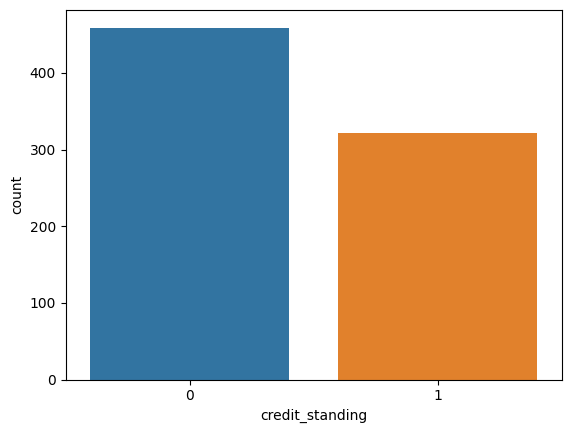

In [98]:
sns.countplot(x='credit_standing', data=df)

plotting the count of good and bad credit standings by housing type.

<Axes: xlabel='credit_standing', ylabel='count'>

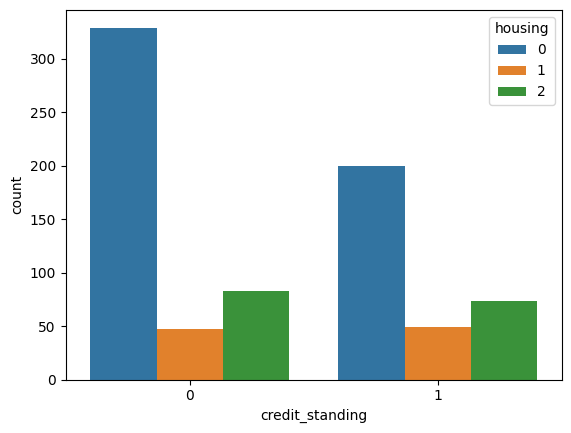

In [100]:
sns.countplot(x='credit_standing', hue='housing', data=df)

plotting the count of good and bad credit standings by job type.

<Axes: xlabel='credit_standing', ylabel='count'>

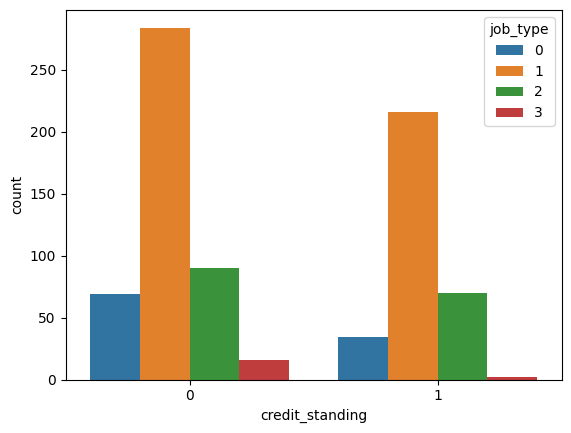

In [101]:
sns.countplot(x='credit_standing', hue='job_type', data=df)

plotting pairwise relationships in the dataset.

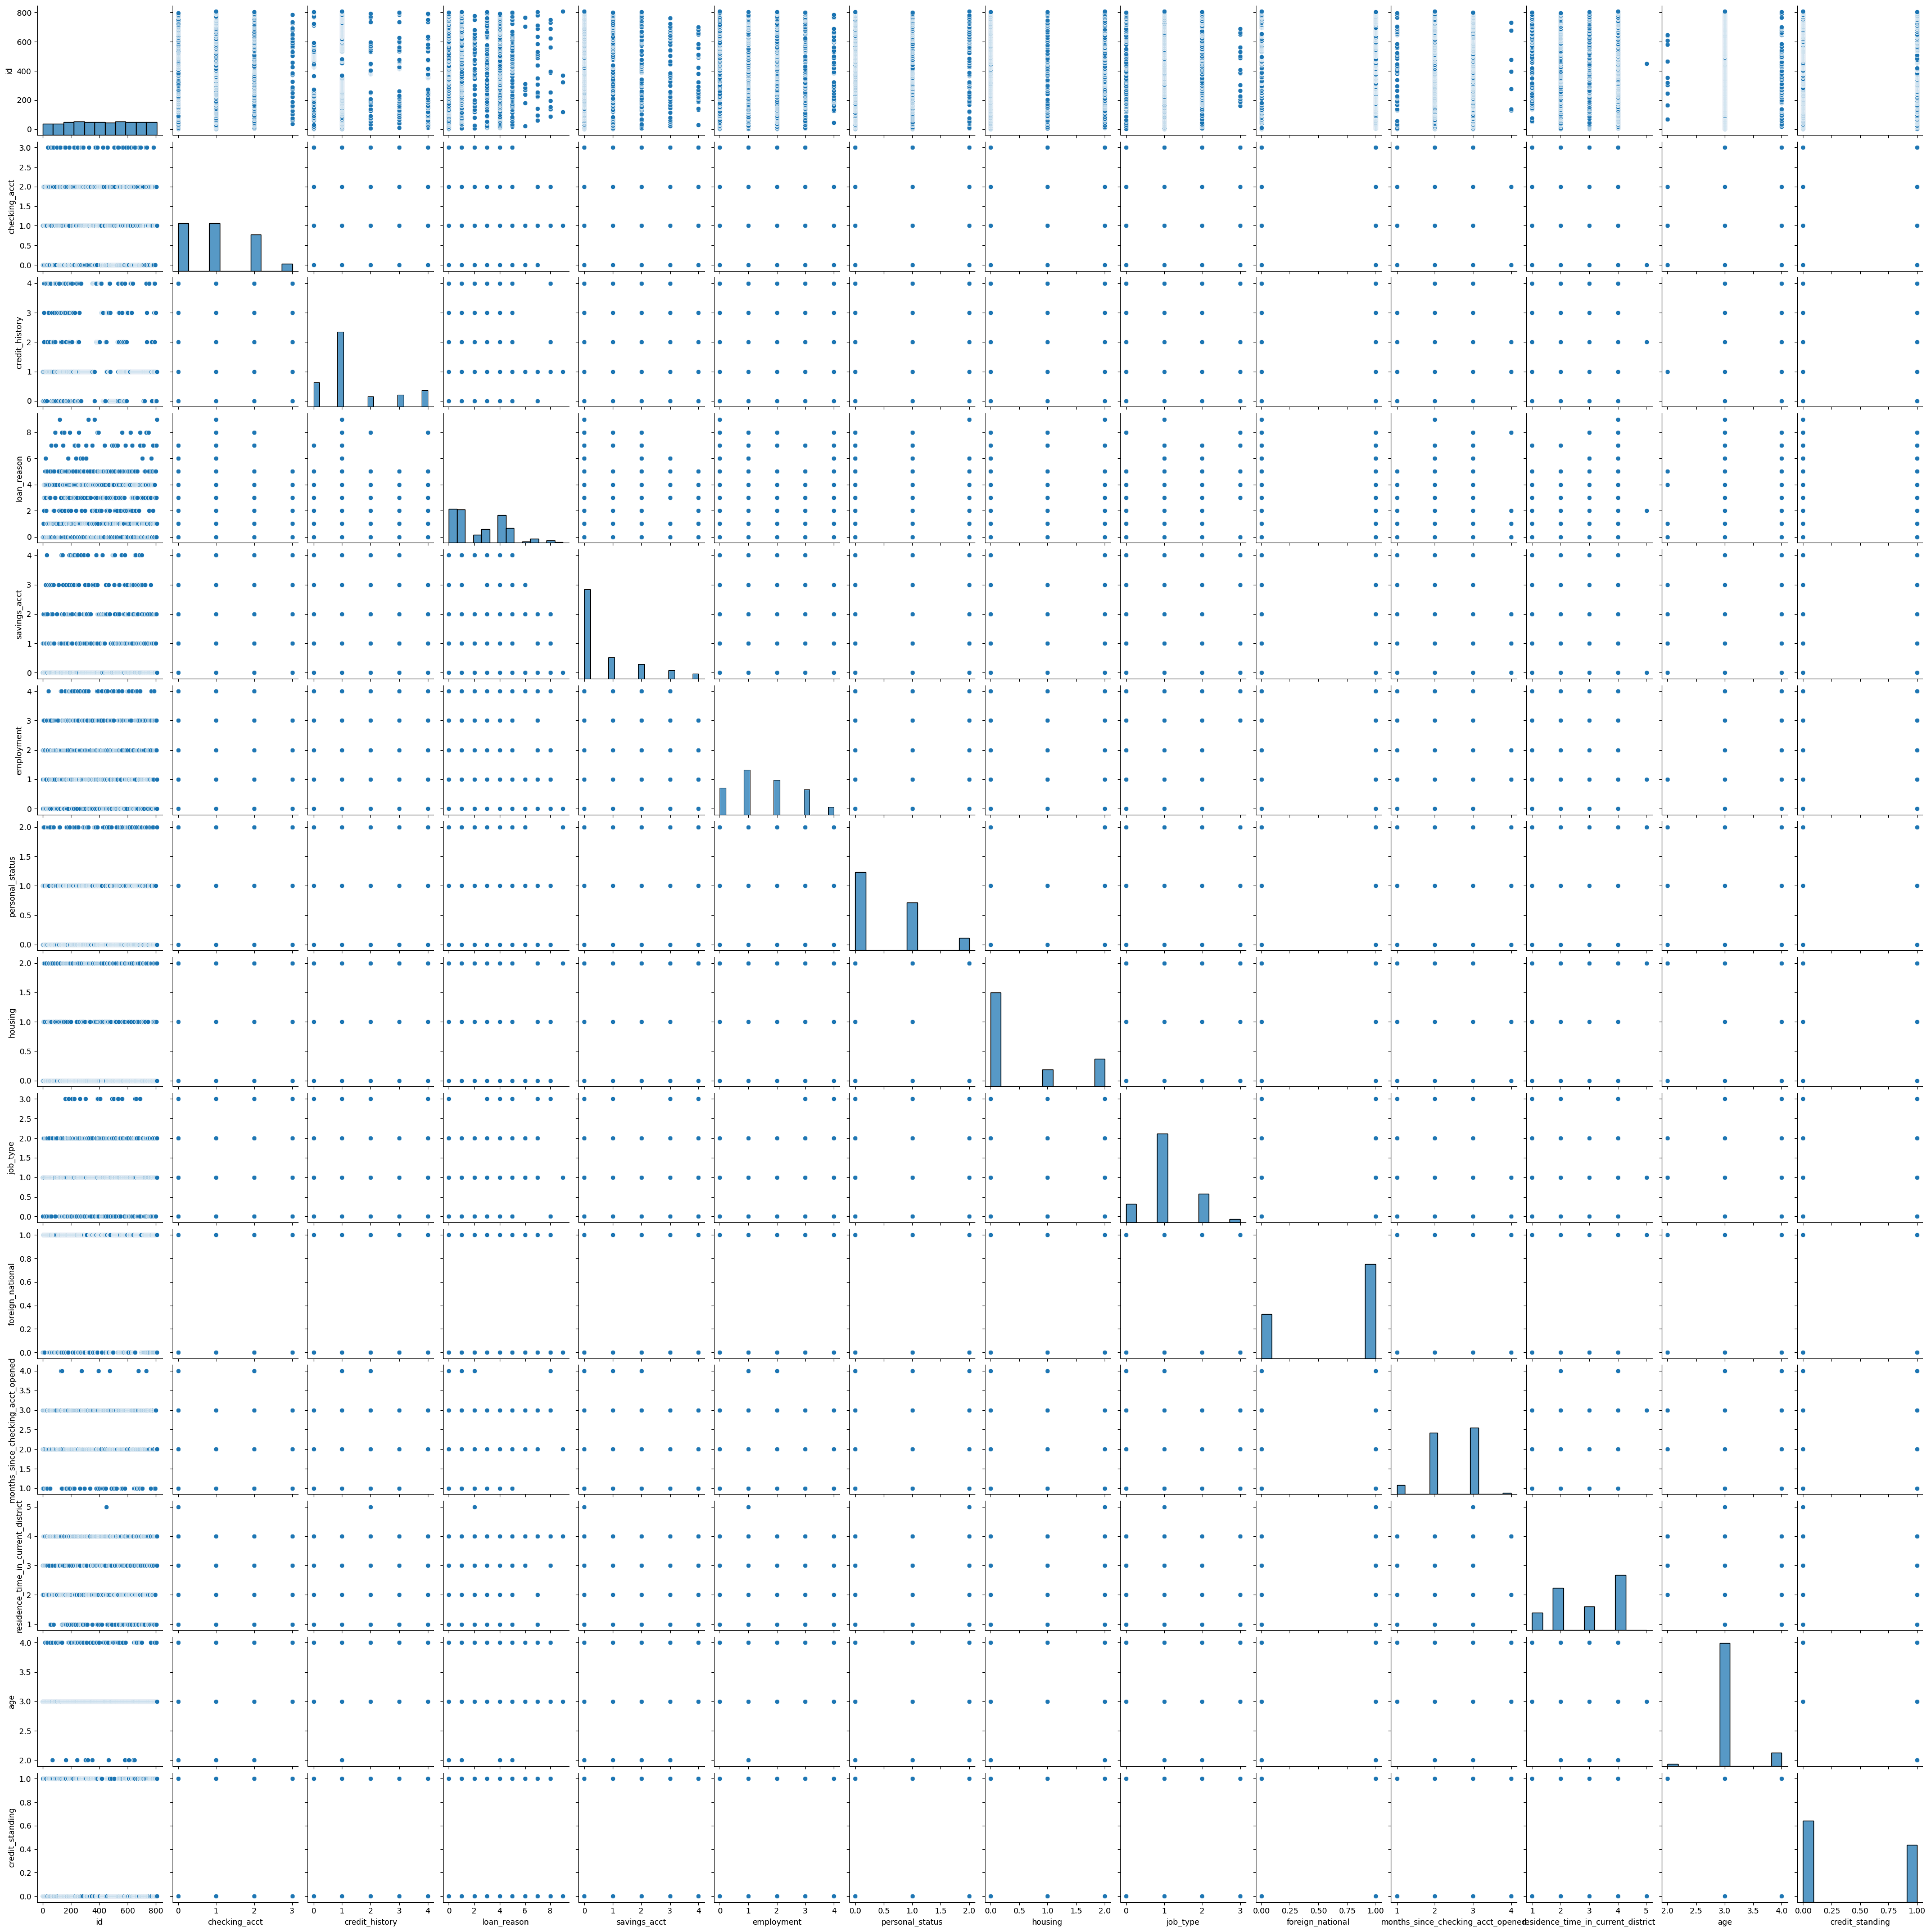

In [102]:
sns.pairplot(df)

plotting a heatmap to show the correlation between the variables.

<Axes: >

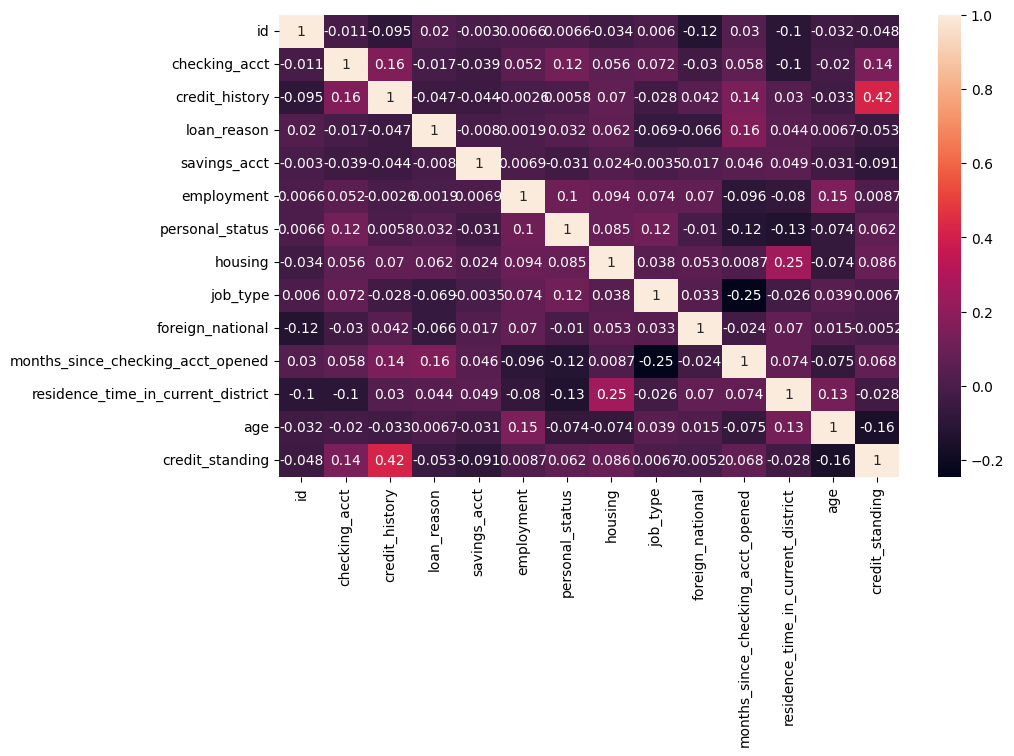

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

Data Preprocessing

In [106]:
le = LabelEncoder()
df['checking_acct'] = le.fit_transform(df['checking_acct'])
df['credit_history'] = le.fit_transform(df['credit_history'])
df['loan_reason'] = le.fit_transform(df['loan_reason'])
df['savings_acct'] = le.fit_transform(df['savings_acct'])
df['employment'] = le.fit_transform(df['employment'])
df['personal_status'] = le.fit_transform(df['personal_status'])
df['housing'] = le.fit_transform(df['housing'])
df['job_type'] = le.fit_transform(df['job_type'])
df['foreign_national'] = le.fit_transform(df['foreign_national'])
df['credit_standing'] = le.fit_transform(df['credit_standing'])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Building different models to choose the best model for this dataset

Model 1: Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, cv=10)
print("Logistic Regression Accuracy: {:.2f} %".format(np.mean(scores)*100))

Logistic Regression Accuracy: 66.35 %


Model 2: KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, cv=10)
print("K-Nearest Neighbors Accuracy: {:.2f} %".format(np.mean(scores)*100))

K-Nearest Neighbors Accuracy: 65.40 %


Model 3: Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, cv=10)
print("Decision Tree Accuracy: {:.2f} %".format(np.mean(scores)*100))

Decision Tree Accuracy: 75.50 %


Model 4: Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=10)
print("Random Forest Accuracy: {:.2f} %".format(np.mean(scores)*100))

Random Forest Accuracy: 76.79 %


Model 5: Support Vector Machine

In [111]:
from sklearn.svm import SVC

svm = SVC()
scores = cross_val_score(svm, X_train, y_train, cv=10)
print("Support Vector Machine Accuracy: {:.2f} %".format(np.mean(scores)*100))

Support Vector Machine Accuracy: 70.68 %


Model 6: Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
scores = cross_val_score(nb, X_train, y_train, cv=10)
print("Naive Bayes Accuracy: {:.2f} %".format(np.mean(scores)*100))

Naive Bayes Accuracy: 64.42 %
